In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [514]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [515]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

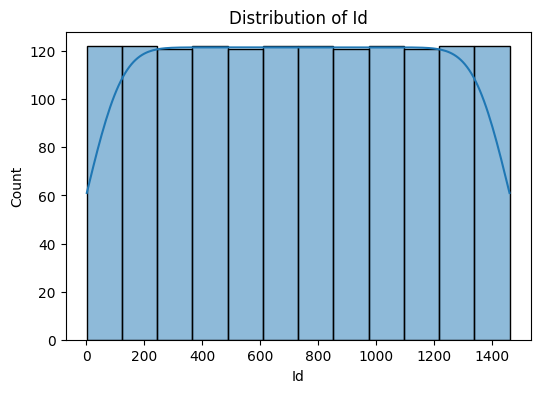

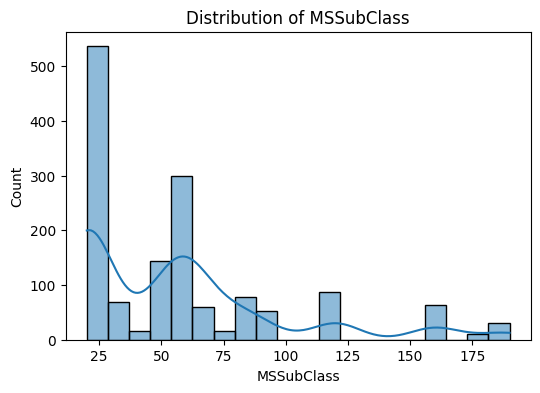

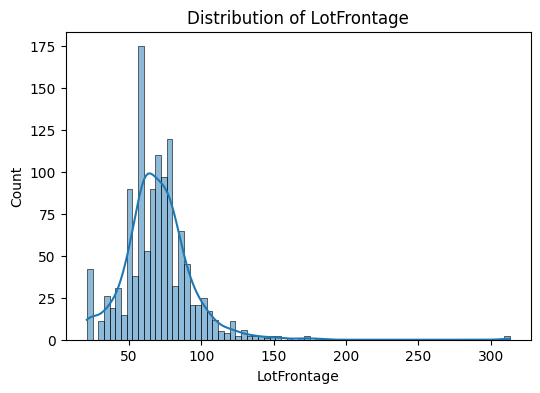

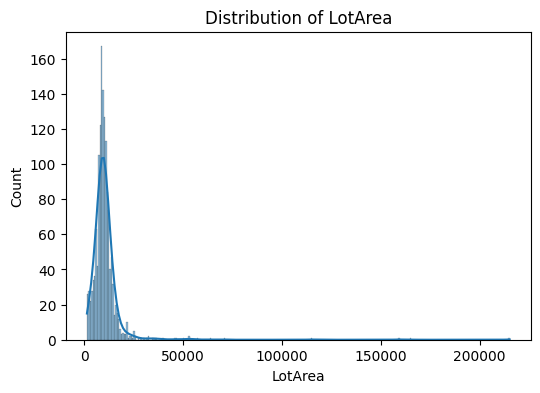

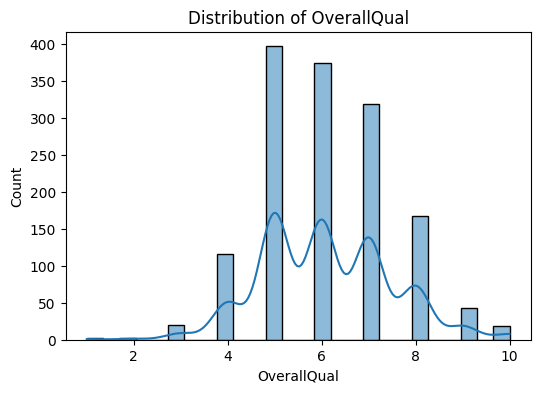

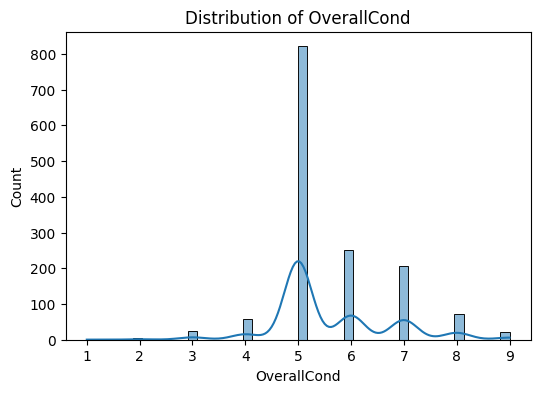

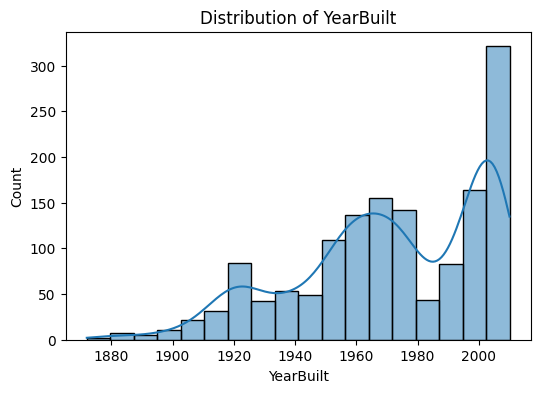

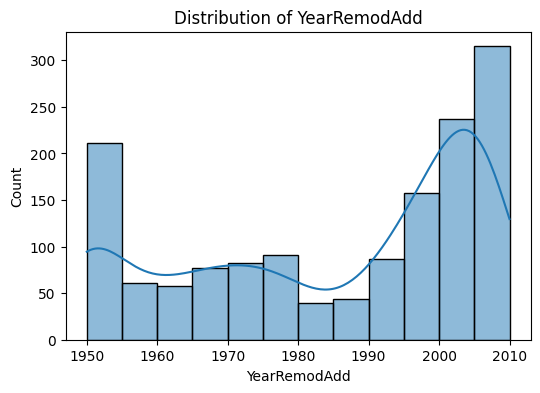

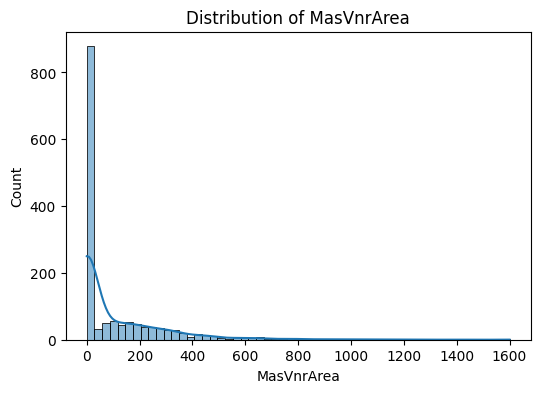

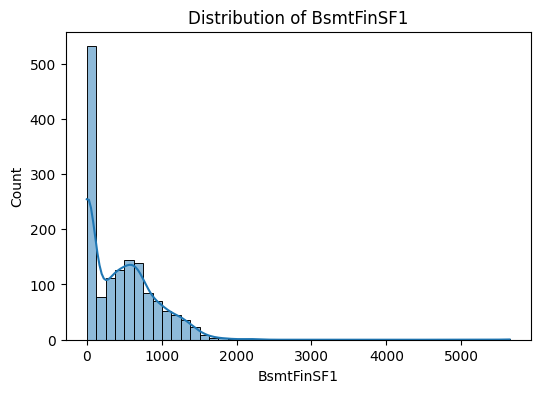

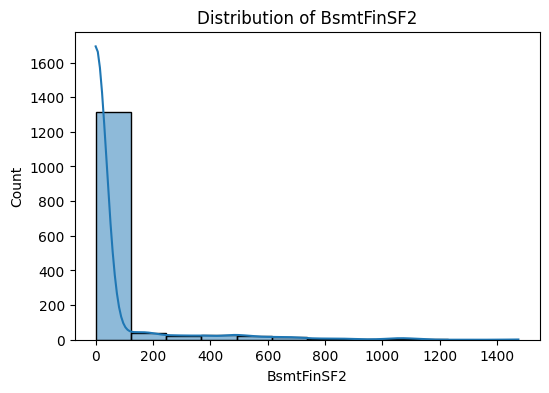

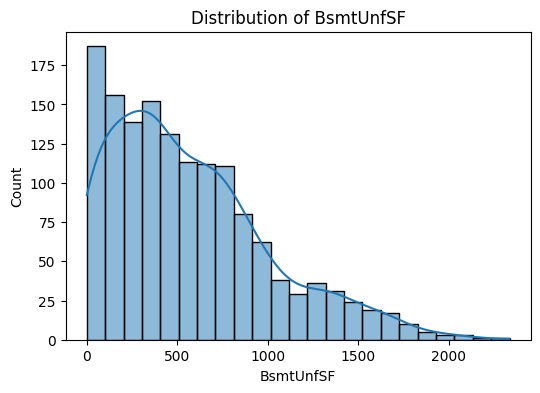

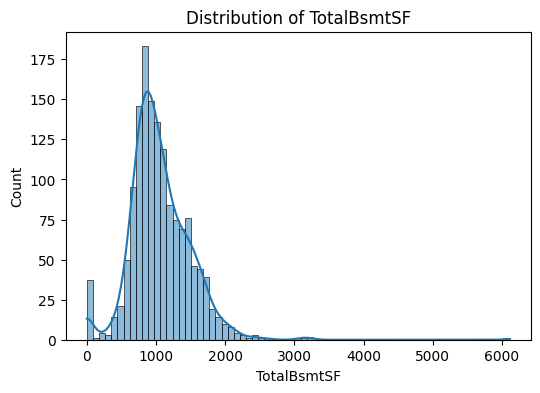

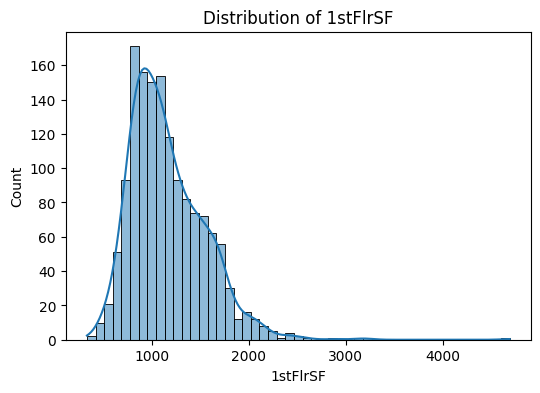

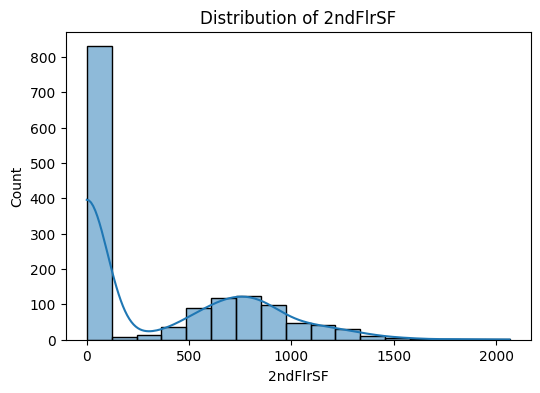

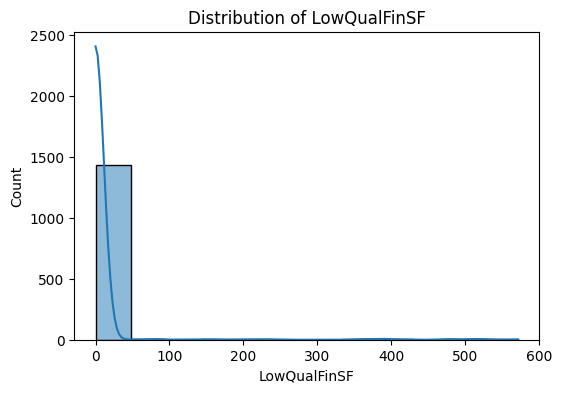

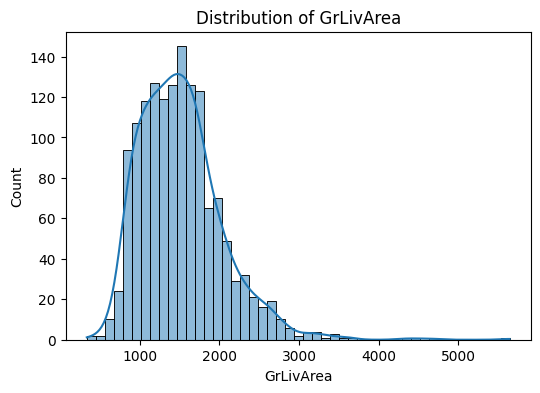

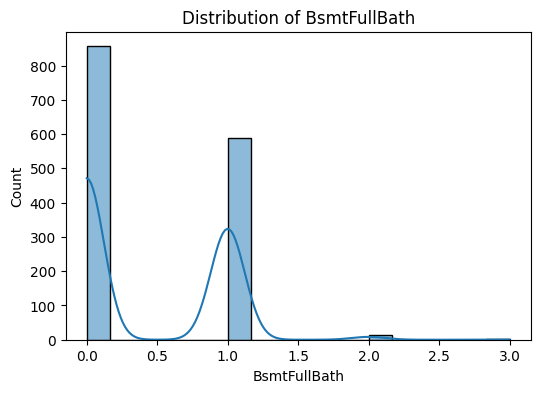

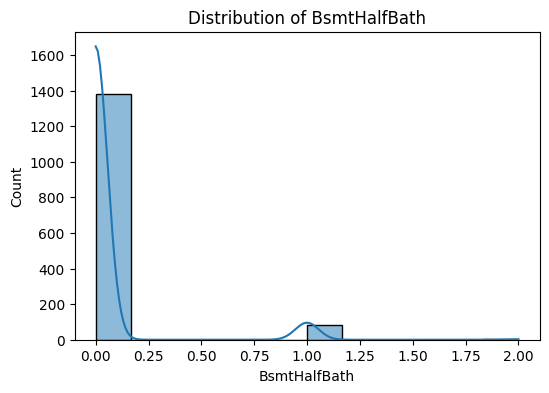

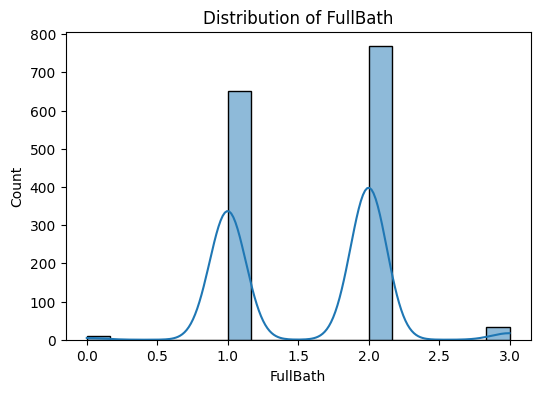

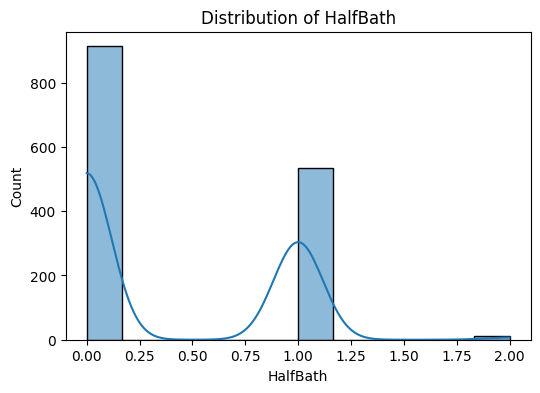

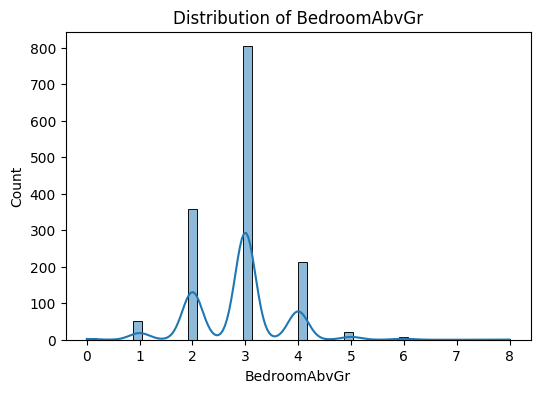

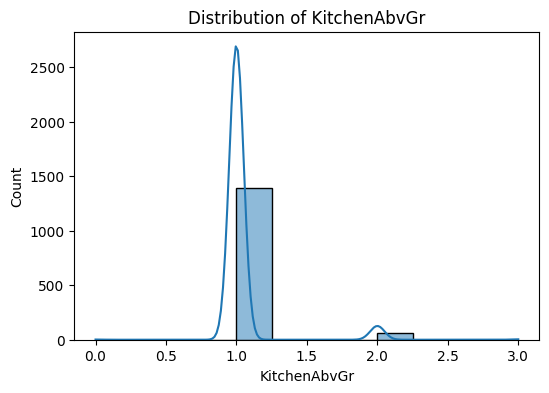

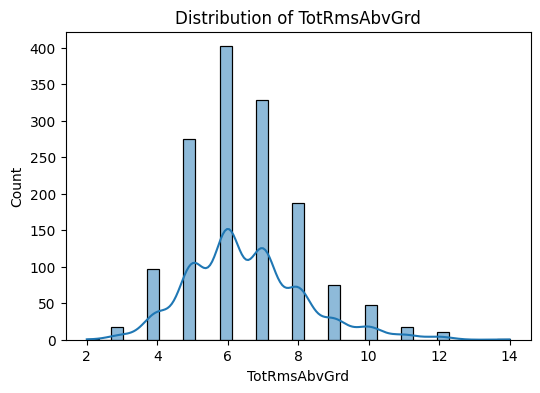

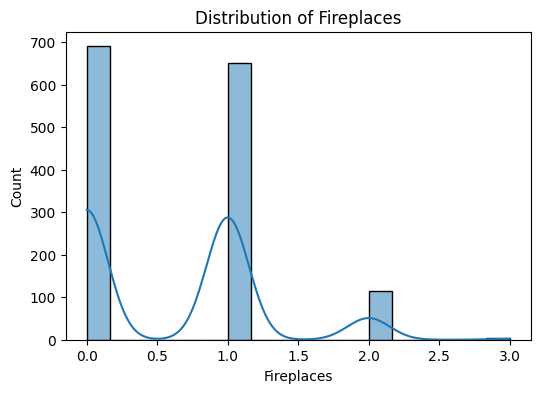

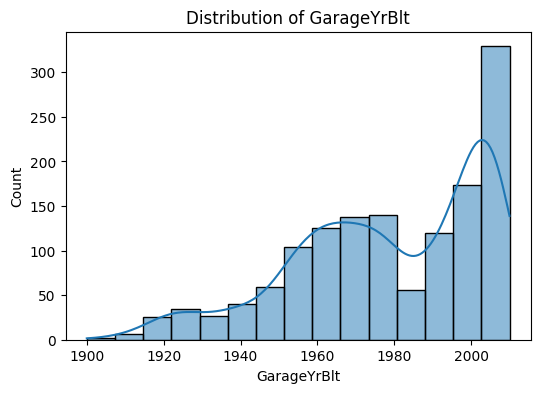

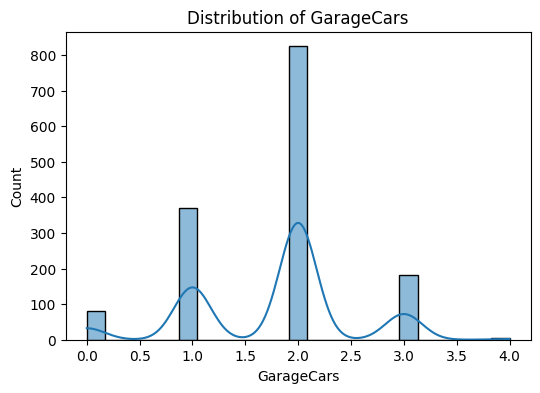

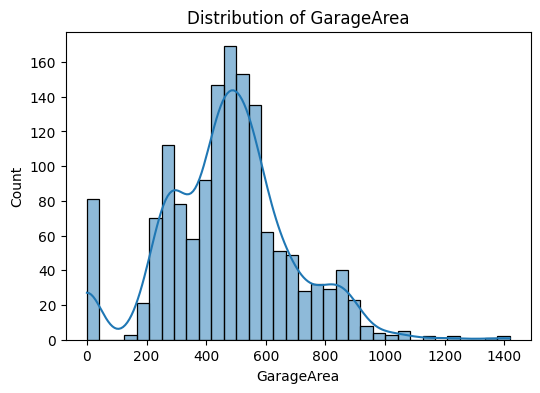

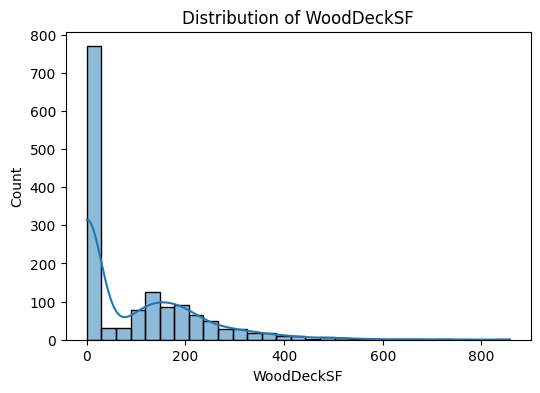

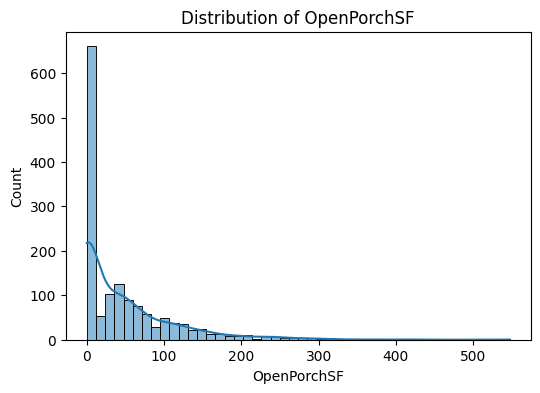

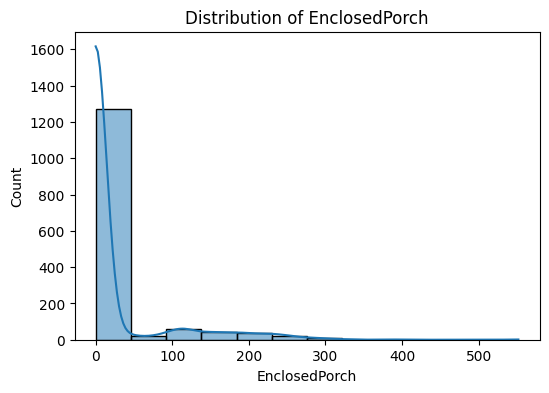

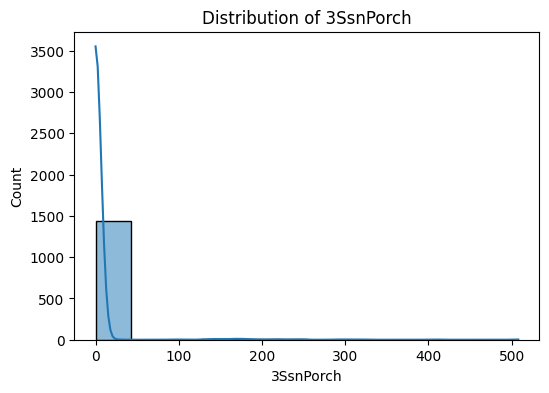

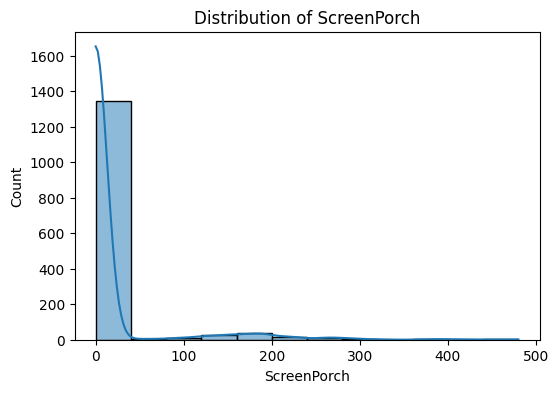

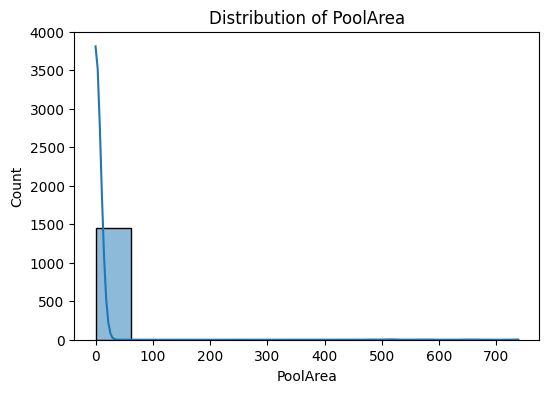

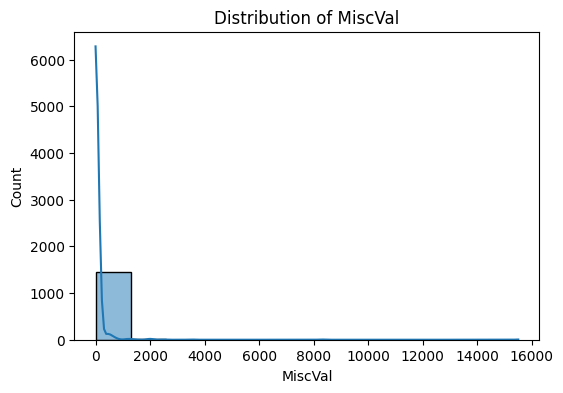

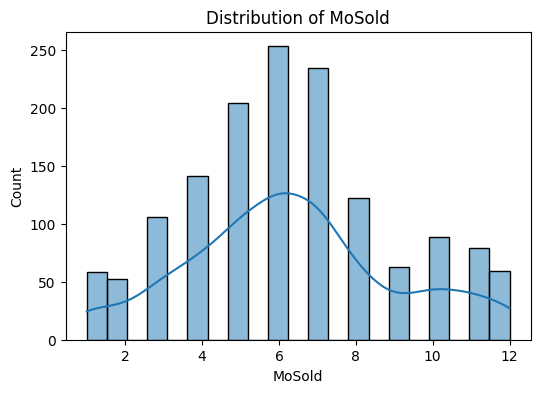

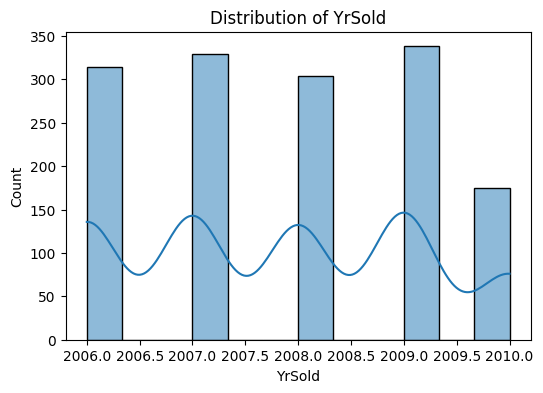

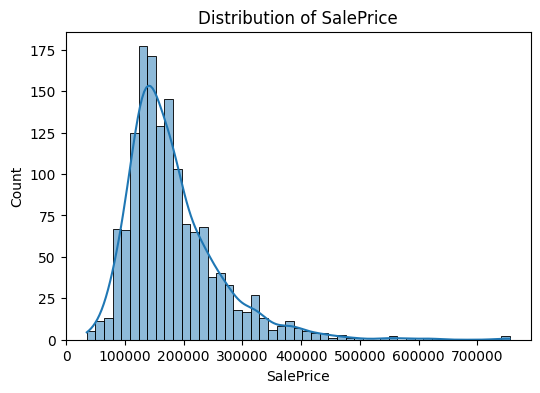

In [516]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [517]:
train_df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

# Missing value and outliers

<Axes: >

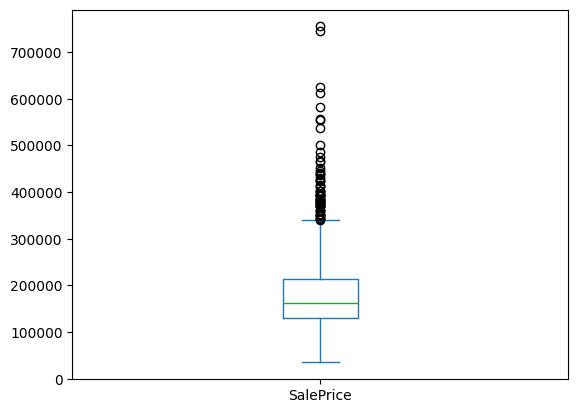

In [518]:
train_df['SalePrice'].plot(kind='box')

In [519]:
Q1 = train_df['SalePrice'].quantile(0.25)
Q3 = train_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[(train_df['SalePrice'] >= Q1 - 2*IQR) & (train_df['SalePrice'] <= Q3 + 2*IQR)]

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

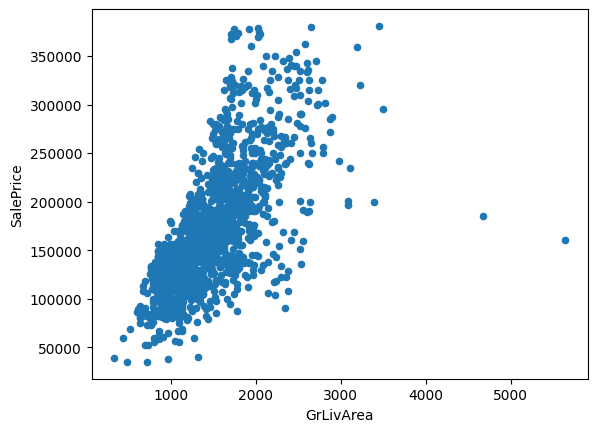

In [520]:
train_df[['SalePrice','GrLivArea']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

In [521]:
train_df['GrLivArea'] = train_df['GrLivArea'].clip(upper=4000)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

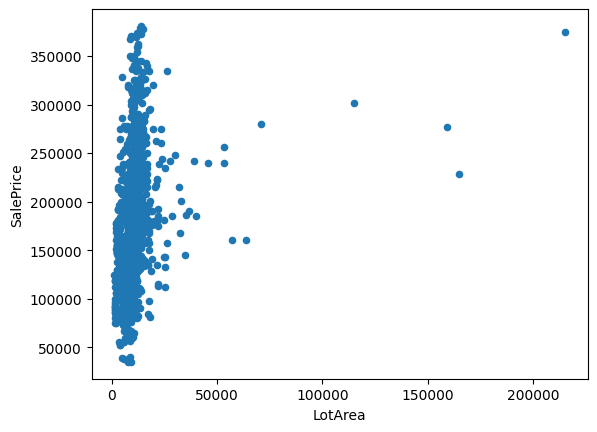

In [522]:
train_df[['SalePrice','LotArea']].plot(kind='scatter', x='LotArea', y='SalePrice')

In [523]:
train_df['LotArea'] = train_df['LotArea'].clip(upper=150000)

<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

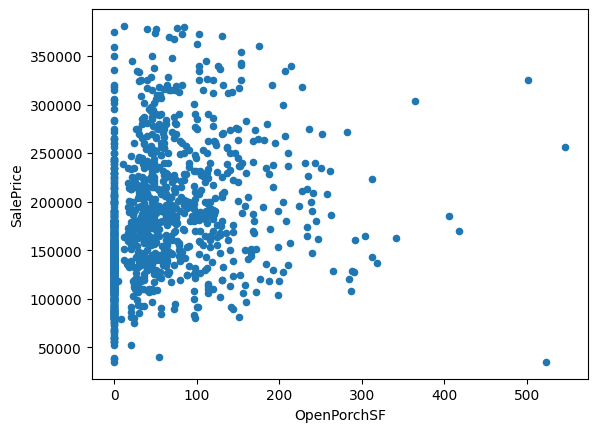

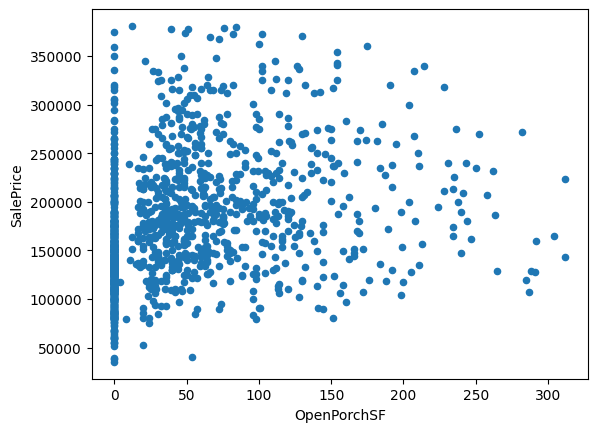

In [524]:
train_df[['SalePrice','OpenPorchSF']].plot(kind='scatter', x='OpenPorchSF', y='SalePrice')

# Remove rows where OpenPorchSF is above 99th percentile
threshold = train_df['OpenPorchSF'].quantile(0.995)
train_df_cleaned = train_df[train_df['OpenPorchSF'] <= threshold]

# Plot again
train_df_cleaned[['SalePrice', 'OpenPorchSF']].plot(kind='scatter', x='OpenPorchSF', y='SalePrice')


<Axes: xlabel='MiscVal', ylabel='SalePrice'>

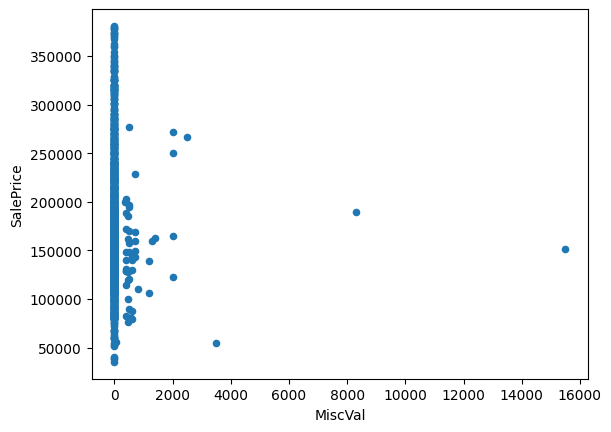

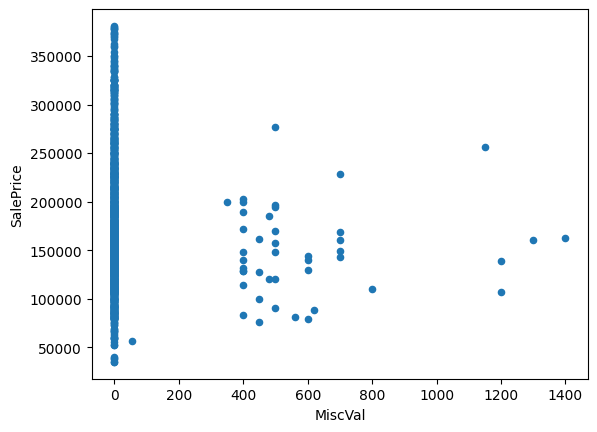

In [525]:
train_df_cleaned[['SalePrice', 'MiscVal']].plot(kind='scatter', x='MiscVal', y='SalePrice')

# Remove rows where OpenPorchSF is above 99th percentile
threshold = train_df['MiscVal'].quantile(0.995)
train_df_cleaned = train_df[train_df['MiscVal'] <= threshold]

# Plot again
train_df_cleaned[['SalePrice', 'MiscVal']].plot(kind='scatter', x='MiscVal', y='SalePrice')

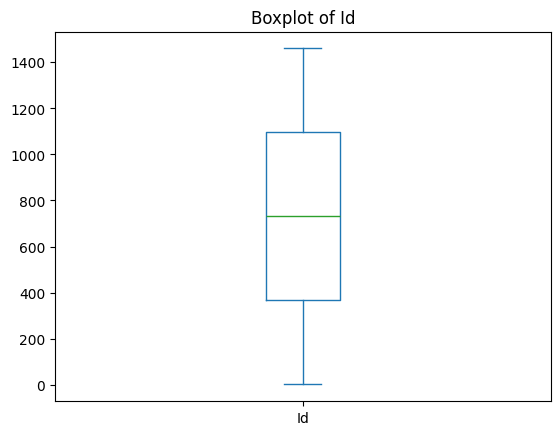

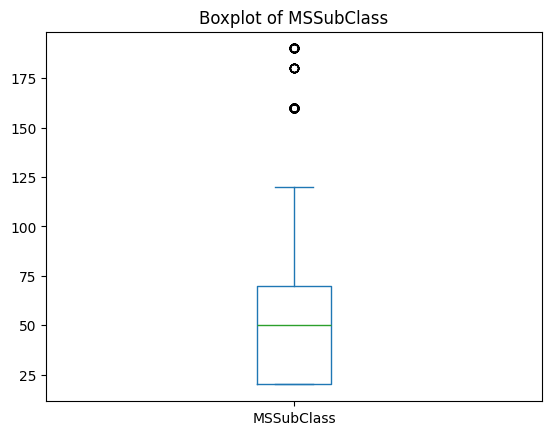

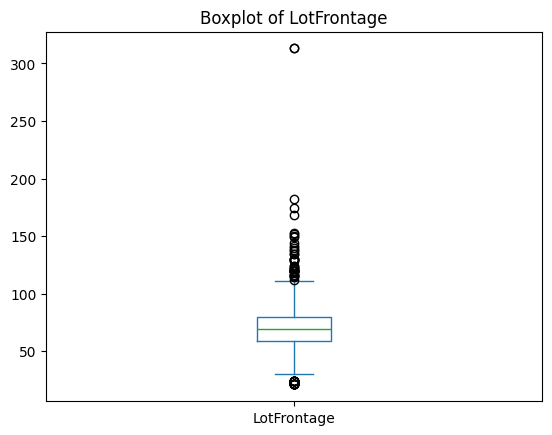

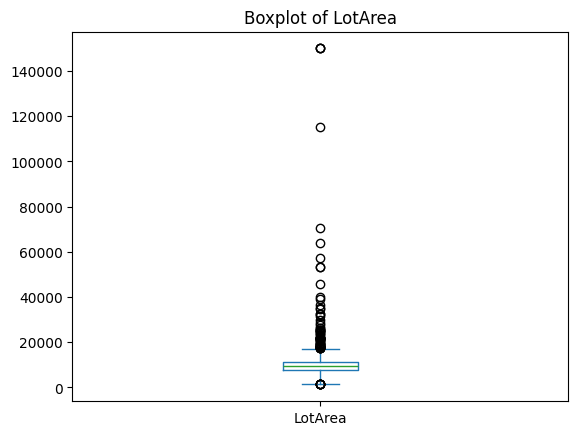

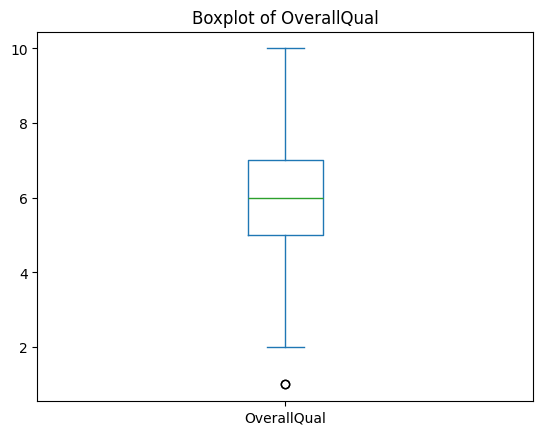

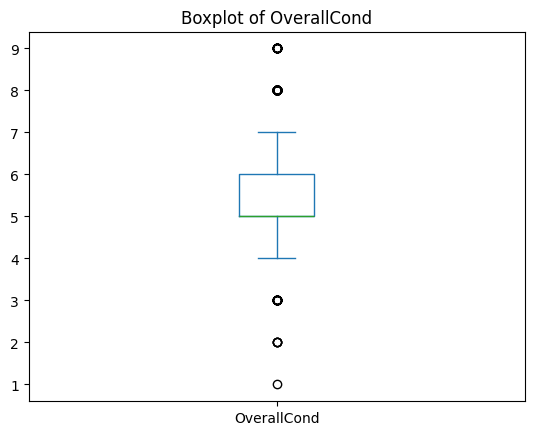

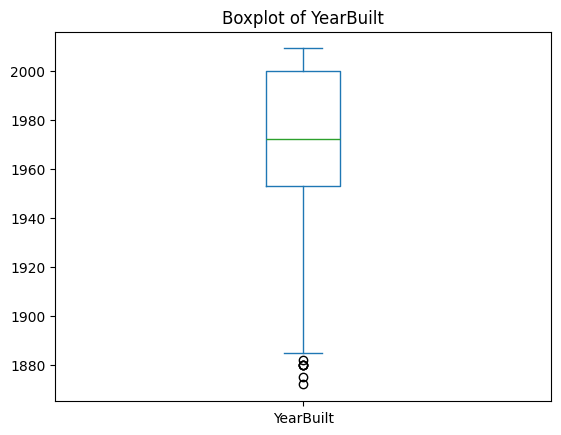

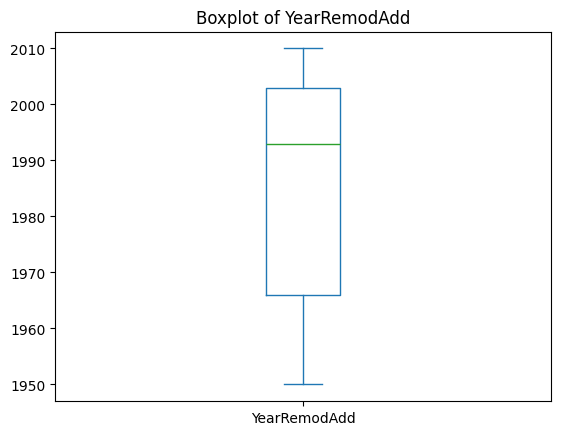

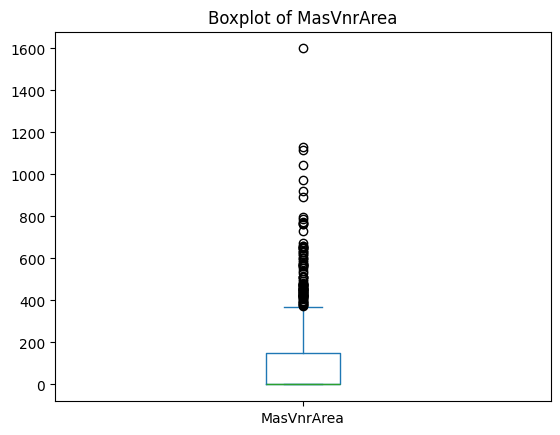

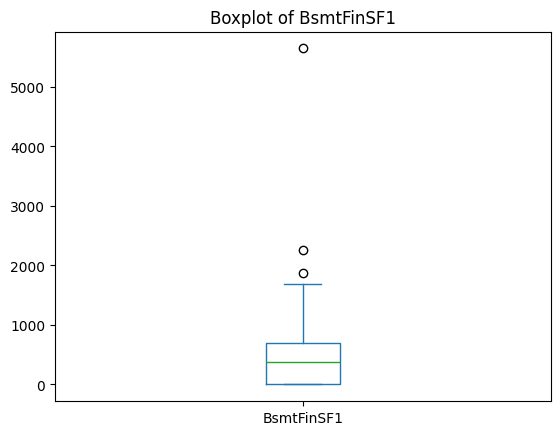

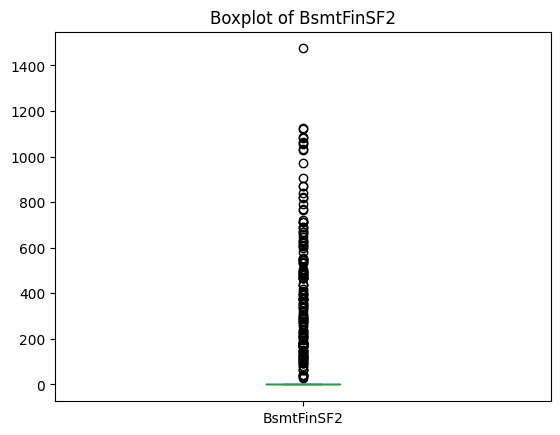

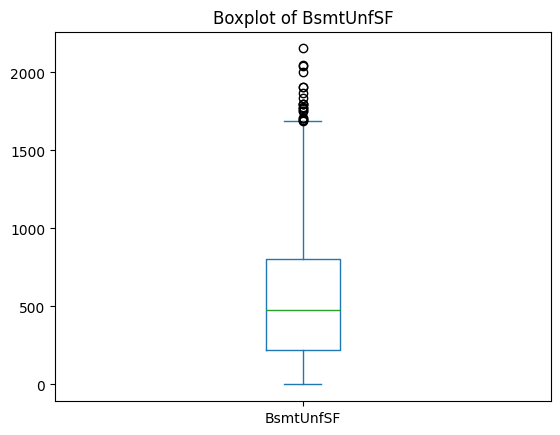

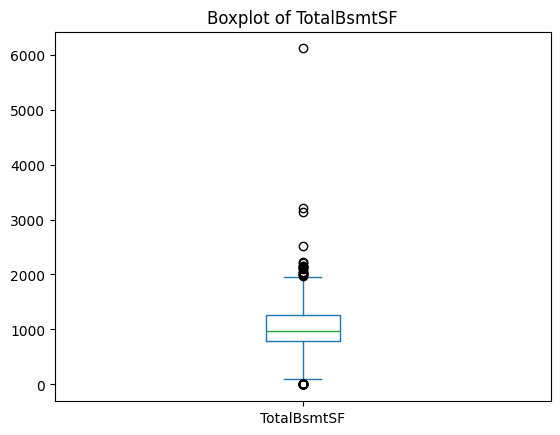

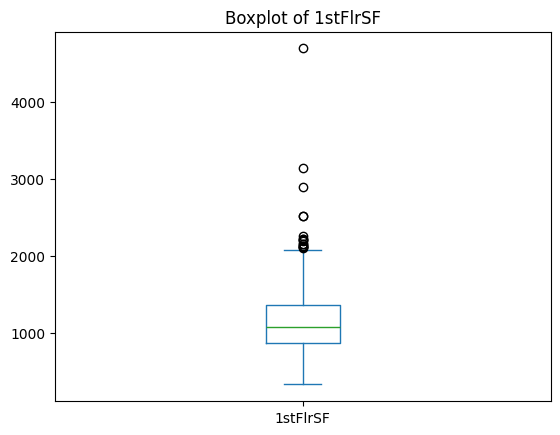

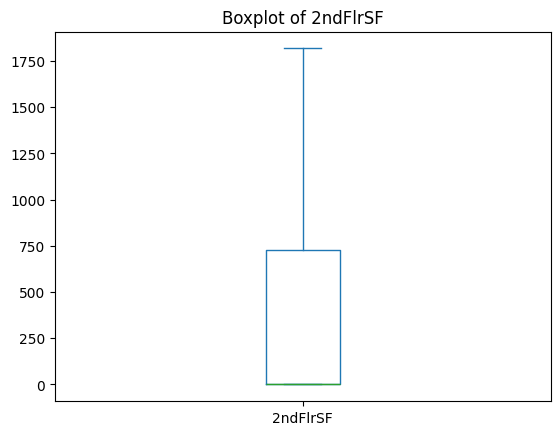

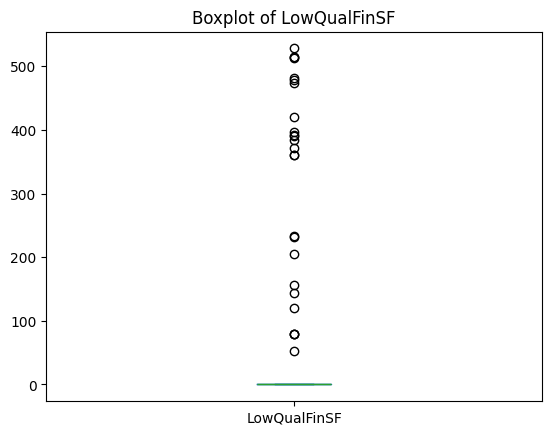

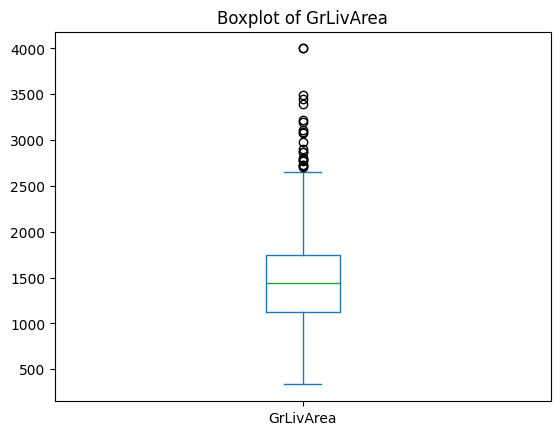

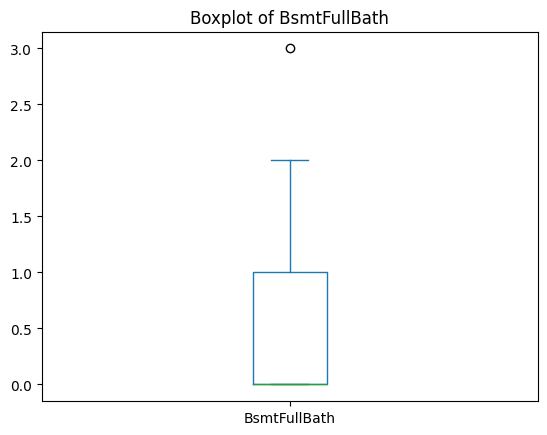

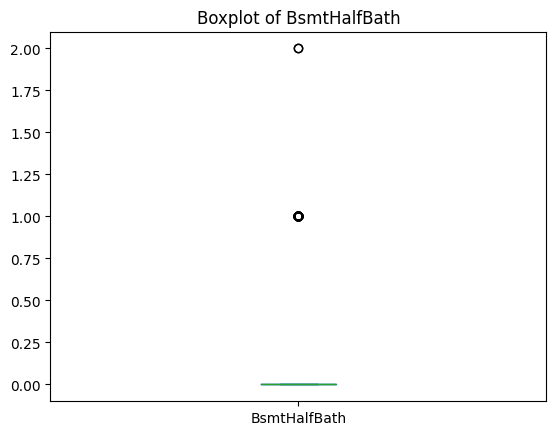

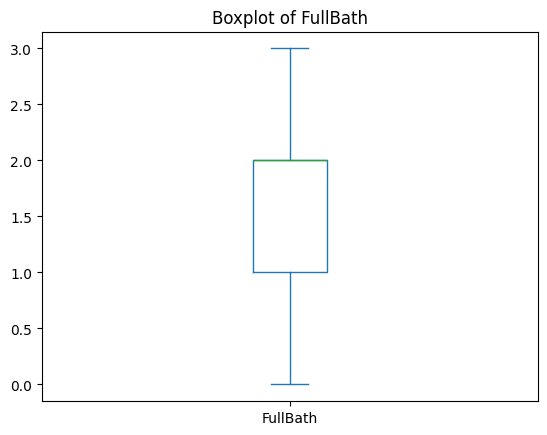

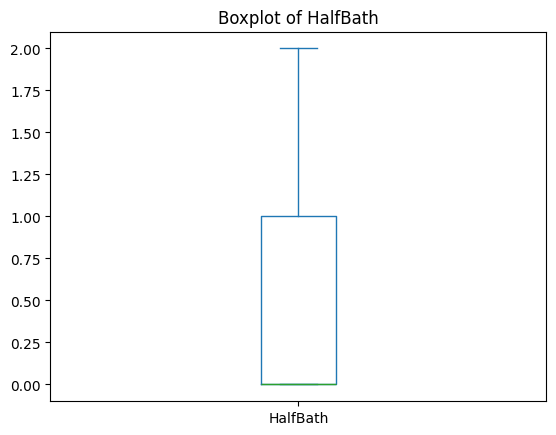

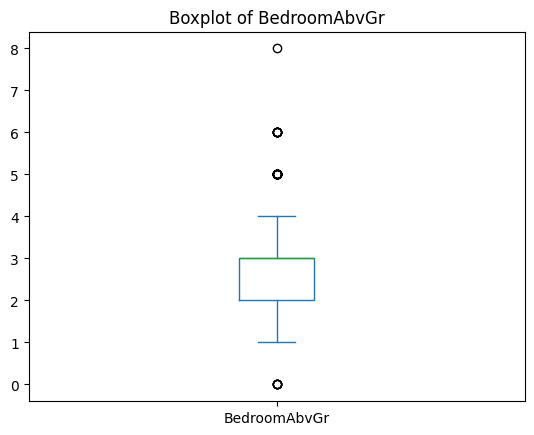

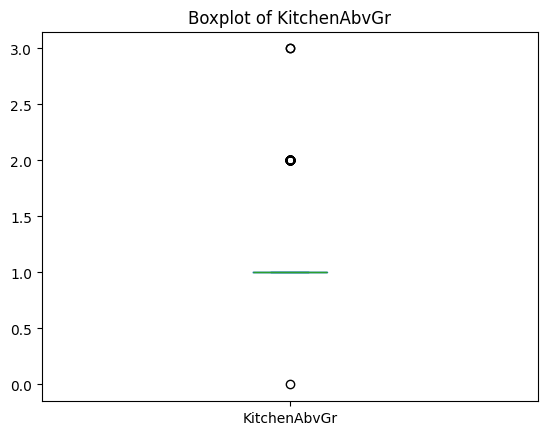

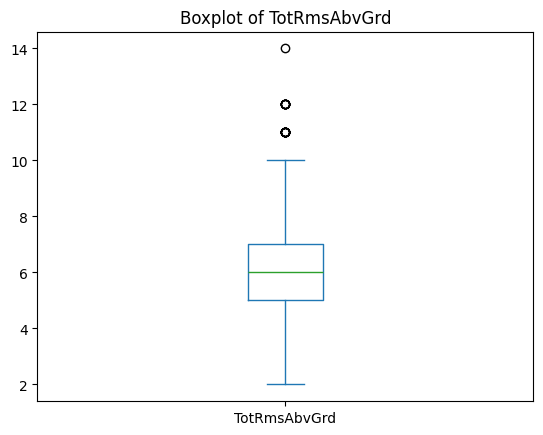

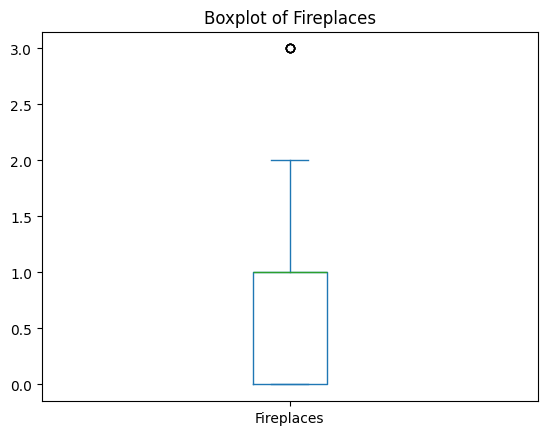

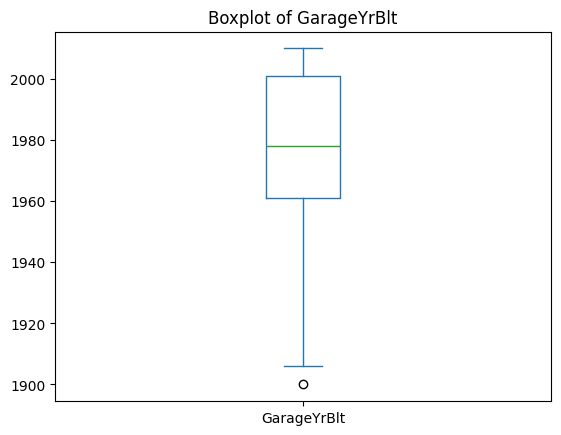

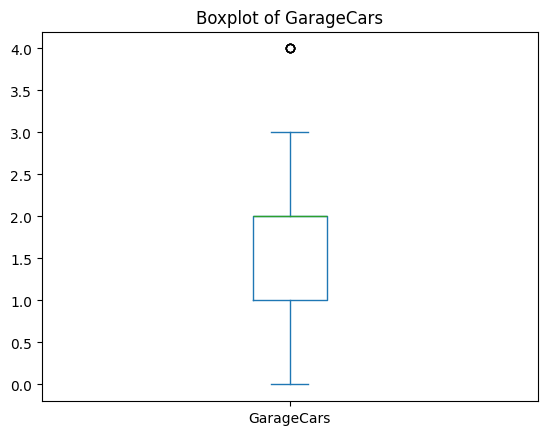

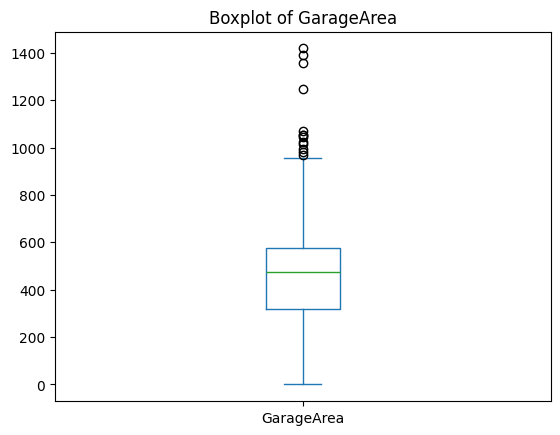

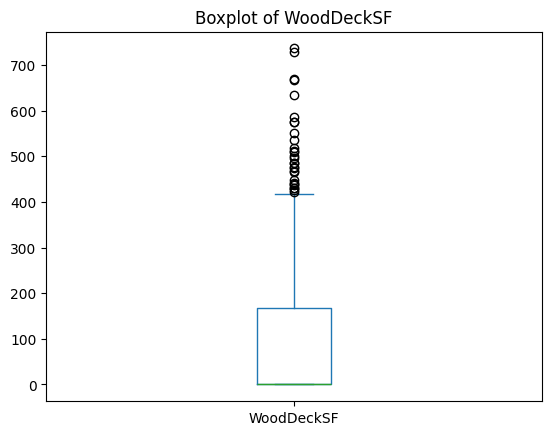

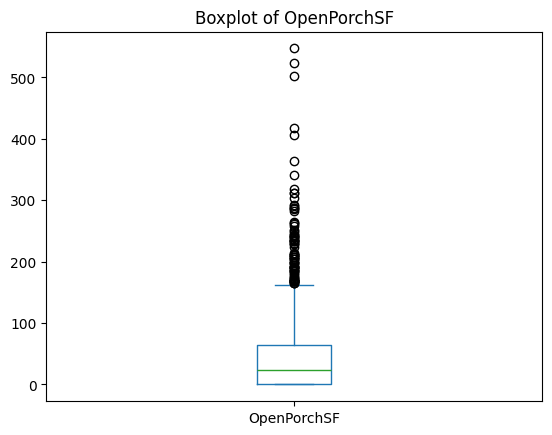

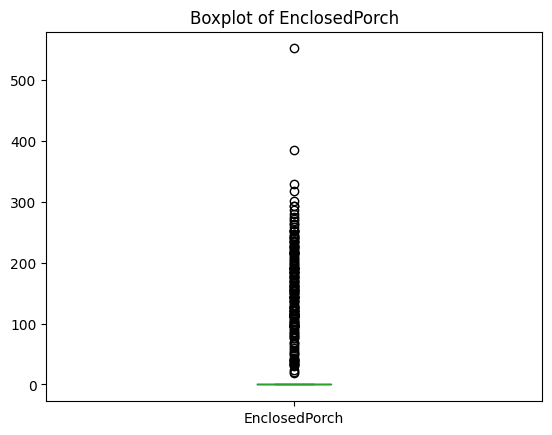

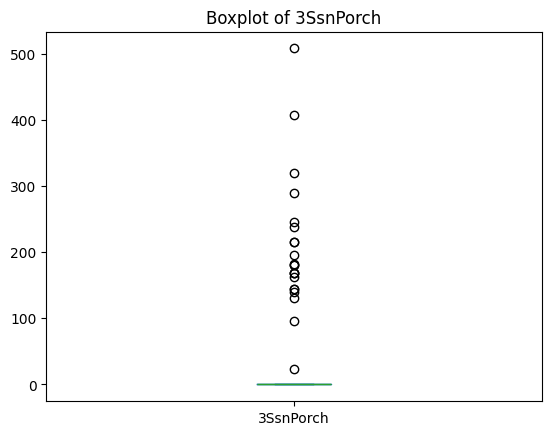

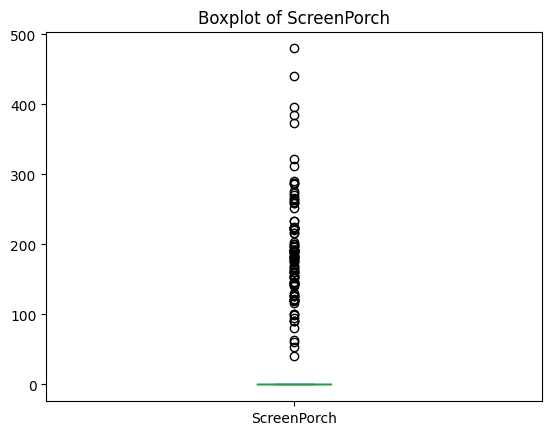

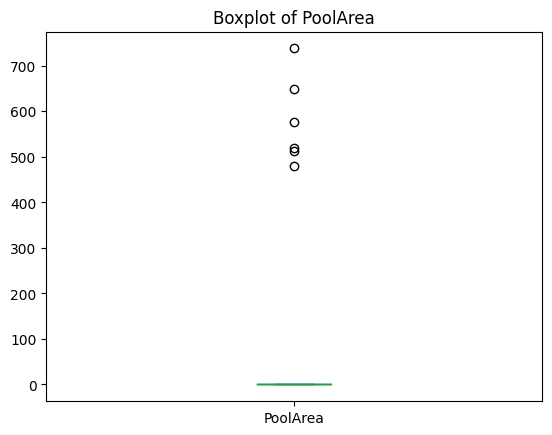

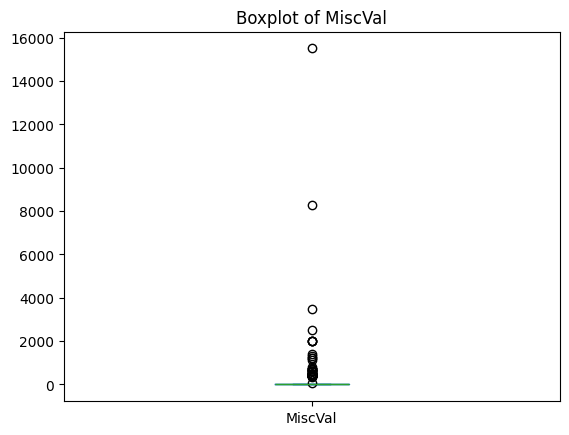

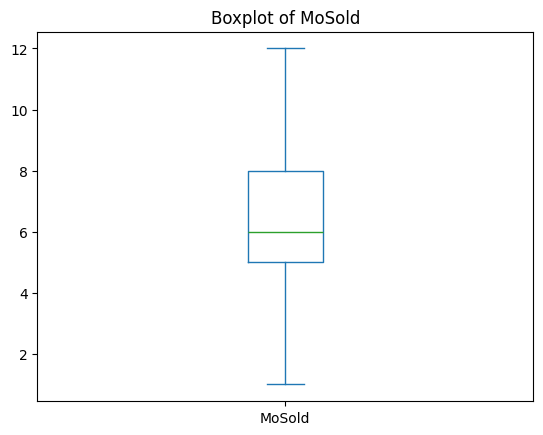

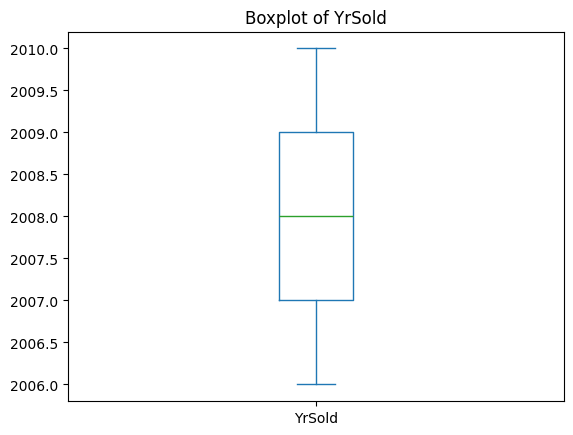

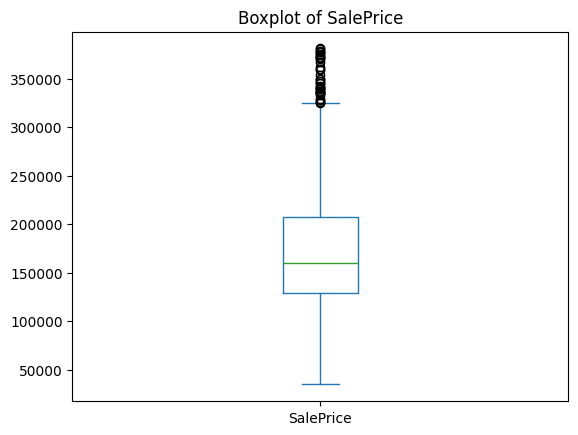

In [526]:
fillna_list = train_df.columns[(train_df.isna().sum() > 0) & (train_df.dtypes == 'object')].tolist()
for col in fillna_list:
    train_df[col] = train_df[col].fillna('Missing')

# Ensure only numeric columns are plotted
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    train_df[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')
    plt.show()

#### if ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'] don't have any value then the house doesn't have basement

In [527]:
# Check for 'Missing' values in the specified columns and sum them
train_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].eq('Missing').sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [528]:
train_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']][train_df['BsmtCond'] == 'Missing']

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
17,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
39,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
90,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
102,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
156,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
182,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
259,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
342,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
362,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0
371,Missing,Missing,Missing,Missing,Missing,0,0,0,0,0


In [529]:
# Define the list of basement-related columns
list2 = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Iterate over the rows and apply the logic
for idx, row in train_df.iterrows():
    # Check if all the columns have 'Missing' in this row
    if all(row[col] == 'Missing' for col in list2):
        # If so, replace 'Missing' with 'No basement'
        for col in list2:
            train_df.at[idx, col] = 'No basement'

#### If ['GarageType','GarageFinish','GarageQual','GarageCond'] columns don't have any value then the house doesn't have garage

In [530]:
list3 = ['GarageType','GarageFinish','GarageQual','GarageCond']
print(train_df[list3].eq('Missing').sum())

for idx, row in train_df.iterrows():
    # Check if all the columns have 'Missing' in this row
    if all(row[col] == 'Missing' for col in list3):
        for col in list3:
            train_df.at[idx, col] = 'No garage'
            

print('-----------after-----------')
print(train_df[['GarageType','GarageFinish','GarageQual','GarageCond']].eq('Missing').sum())

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64
-----------after-----------
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


#### Missing value of masonry, fireplace and fence means the house doesn't have ones

In [531]:
# List of columns with large missing values
list4 = ['MasVnrType', 'FireplaceQu', 'Fence']

for col in list4:
    # Replace 'Missing' with a string 'No {col}' where {col} is the column name
    train_df[col] = train_df[col].replace('Missing', f'No {col}')

#### columns which have a little diff between missing and non-missing values

# missing value in numerical columns

In [532]:
print(train_df.isna().sum().sort_values(ascending=False))

LotFrontage     257
GarageYrBlt      81
MasVnrArea        7
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64


In [533]:
train_df[['BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF']] = train_df[['BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF']].fillna(0)

# Fill GarageArea and GarageYrBlt with 0 when GarageType is 'No garage' and GarageYrBlt is NaN
train_df.loc[
    (train_df['GarageYrBlt'].isna()) & (train_df['GarageType'] == 'No garage'), 
    ['GarageArea', 'GarageYrBlt','GarageCars']
] = 0

# Replace remaining NaN values in GarageArea and GarageYrBlt with their respective column means
train_df[['GarageArea', 'GarageYrBlt','GarageCars']] = train_df[['GarageArea', 'GarageYrBlt','GarageCars']].fillna(train_df[['GarageArea', 'GarageYrBlt','GarageCars']].mean())

In [534]:
train_df[['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']] = train_df[['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']].fillna(0)

In [535]:
def eda(df, df_name):
    df.drop_duplicates(inplace=True)
    # replace the 'PoolQC' with 'Have pool'
    df['PoolQC'] = df['PoolQC'].fillna('Missing')
    df['HavePool'] = (df['PoolArea'] > 0).astype(int)
    
    # Fill NaN values in 'MiscFeature' with 'Unknown'
    df['MiscFeature'] = df['MiscFeature'].fillna('Unknown')
    
    fillna_list = df.columns[(df.isna().sum() > 0) & (df.dtypes == 'object')].tolist()
    # Fill NaN values in object columns with 'Missing'
    for col in fillna_list:
        df[col] = df[col].fillna('Missing')
        
    # fill the missing values with its mode when the missing value is small amount and not much diff 
    list1 = ['Exterior1st','Exterior2nd','KitchenQual','Functional']
    for col in list1:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    # Define the list of basement-related columns
    list2 = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

    # Iterate over the rows and apply the logic
    for idx, row in df.iterrows():
        # Check if all the columns have 'Missing' in this row
        if all(row[col] == 'Missing' for col in list2):
            # If so, replace 'Missing' with 'No basement'
            for col in list2:
                df.at[idx, col] = 'No basement'
                
    list3 = ['GarageType','GarageFinish','GarageQual','GarageCond']

    for idx, row in df.iterrows():
        # Check if all the columns have 'Missing' in this row
        if all(row[col] == 'Missing' for col in list3):
            for col in list3:
                df.at[idx, col] = 'No garage'  
    
    # List of columns with large missing values
    list4 = ['MasVnrType', 'FireplaceQu', 'Fence']

    for col in list4:
        # Replace 'Missing' with a string 'No {col}' where {col} is the column name
        df[col] = df[col].replace('Missing', f'No {col}')   

    df[['BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF']] = df[['BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF']].fillna(0)

    # Fill GarageArea and GarageYrBlt with 0 when GarageType is 'No garage' and GarageYrBlt is NaN
    df.loc[
        (df['GarageYrBlt'].isna()) & (df['GarageType'] == 'No garage'), 
        ['GarageArea', 'GarageYrBlt','GarageCars']
    ] = 0

    # Replace remaining NaN values in GarageArea and GarageYrBlt with their respective column means
    df[['GarageArea', 'GarageYrBlt','GarageCars']] = df[['GarageArea', 'GarageYrBlt','GarageCars']].fillna(df[['GarageArea', 'GarageYrBlt','GarageCars']].mean())

    df[['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']] = df[['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF']].fillna(0)

    df[ 'MasVnrArea']= df[ 'MasVnrArea'].fillna(0)
    
    # Interpolate missing values for LotFrontage and LotArea and assign the result back to the column
    df['LotFrontage'] = df['LotFrontage'].interpolate(method='linear')
    df['LotArea'] = df['LotArea'].interpolate(method='linear')

    df.to_csv(f'cleaned_{df_name}.csv', index=False)

eda(train_df, 'train_df')
eda(test_df, 'test_df')